## <center> Assignment 4. Sarcasm detection with logistic regression
    
We'll be using the dataset from the [paper](https://arxiv.org/abs/1704.05579) "A Large Self-Annotated Corpus for Sarcasm" with >1mln comments from Reddit, labeled as either sarcastic or not. A processed version can be found on Kaggle in a form of a [Kaggle Dataset](https://www.kaggle.com/danofer/sarcasm).

Sarcasm detection is easy. 

<img src="https://habrastorage.org/webt/1f/0d/ta/1f0dtavsd14ncf17gbsy1cvoga4.jpeg" />

# Detección de sarcasmo
Para este ejercicio vas a utilizar el dataset del paper [A Large Self-Annotated Corpus for Sarcasm](https://arxiv.org/abs/1704.05579), con un millón de comentarios de Reddit, etiquetados como sarcásticos o no sarcásticos. Se pide:
1. Si hubiese missings, eliminalos




In [1]:
# some necessary imports
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../dataNLP/train-balanced-sarcasm.csv')
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


## Tareas:
1. Analizar el conjunto de datos, realizar algunos gráficos. Este [Kernel](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc) podría servir como ejemplo.
2. Construir un pipeline de Tf-Idf + regresión logística para predecir sarcasmo (`label`) basado en el texto de un comentario en Reddit (`comment`).
3. Graficar las palabras/bigramas que son más predictivos de sarcasmo (puedes usar [eli5](https://github.com/TeamHG-Memex/eli5) para eso).
4. (Opcionalmente) añadir subreddits como nuevas características para mejorar el rendimiento del modelo. Aplica aquí el enfoque de Bolsa de Palabras, es decir, trata cada subreddit como una nueva característica.

## Enlaces:
- Biblioteca de aprendizaje automático [Scikit-learn](https://scikit-learn.org/stable/index.html) (también conocida como sklearn).
- Kernels sobre [regresión logística](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-2-classification) y sus aplicaciones a la [clasificación de texto](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-4-more-of-logit), también un [Kernel](https://www.kaggle.com/kashnitsky/topic-6-feature-engineering-and-feature-selection) sobre ingeniería de características y selección de características.
- [Kernel de Kaggle](https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle) "Aproximándose a (Casi) Cualquier Problema de Procesamiento de Lenguaje Natural en Kaggle".
- [ELI5](https://github.com/TeamHG-Memex/eli5) para explicar las predicciones del modelo.


In [3]:
df['label'].value_counts()

label
0    505413
1    505413
Name: count, dtype: int64

<AxesSubplot: xlabel='label', ylabel='count'>

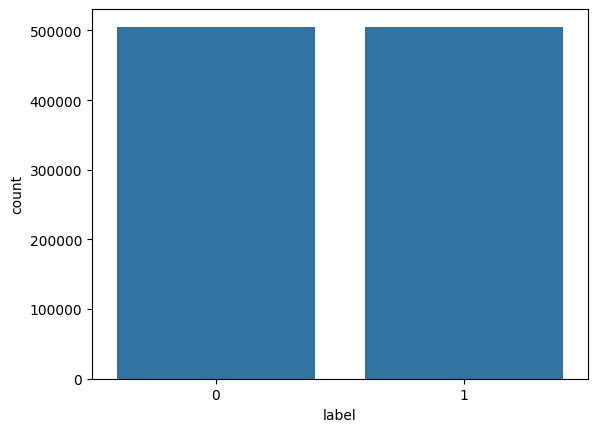

In [5]:
sns.countplot(df, x = 'label') 

In [ ]:
cnt_srs = train_df['target'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Target Count',
    font=dict(size=18)
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

## target distribution ##
labels = (np.array(cnt_srs.index))
sizes = (np.array((cnt_srs / cnt_srs.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Target distribution',
    font=dict(size=18),
    width=600,
    height=600,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")